# BISI Group 3 Capstone Project CRA - PM Cost Variance and Deliverable Prediction EDA

In [64]:
# Importing necessary libraries for EDA

import pandas as pd
import numpy as np

import seaborn  as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [65]:
# Importing Dataset
df = pd.read_excel("PM Baseline Cost.xlsx")

In [66]:
# Viewing Dataset
df.head(10)

,Order #:,Requirement Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Effort Cost,Deliver
0,164946,sub-project-1,Development,High,CPAT-1,DIR-1,Div-1,Sec-1,6612.540000,Yes
1,164946,sub-project-1,Development,High,EFRC,DIR-2,Div-2,Sec-2,5582.680000,Yes
2,164946,sub-project-1,Development,High,ACC,DIR-2,Div-2,Sec-3,48930.000000,Yes
3,164946,sub-project-1,Development,High,WWE-CC,DIR-1,Div-3,Sec-4,921347.240000,Yes
4,164946,sub-project-1,Development,High,CCSS,DIR-1,Div-3,Sec-4,125139.640000,Yes
5,165847,sub-project-2,Enhancement,Medium,USRWTS,DIR-3,Div-4,Sec-5,11740.264746,Yes
6,165847,sub-project-2,Enhancement,Medium,AACCSS,DIR-4,Div-5,Sec-6,12390.940000,Yes
7,165847,sub-project-2,Enhancement,Medium,WERT,DIR-3,Div-6,Sec-7,10546.861045,Yes
8,165847,sub-project-2,Enhancement,Medium,SDFSA,DIR-3,Div-7,Sec-8,7707.640000,No
9,165847,sub-project-2,Enhancement,Medium,Generic,DIR-3,Div-7,Sec-8,10485.000000,Yes


In [67]:
# Datatypes
df.dtypes

Order #:                 int64
Requirement Title       object
Work Classification     object
Priority                object
Application Name        object
IT Directorate          object
IT Division             object
IT Section              object
Effort Cost            float64
Deliver                 object
dtype: object

In [68]:
# Stats about the dataset
print("Dataset Shape: ", df.shape)


print("Dataset Stats : ")
df.describe()

Dataset Shape:  (76, 10)
Dataset Stats : 


,Order #:,Effort Cost
count,76.000000,76.000000
mean,165963.157895,52021.292897
std,335.793312,128523.487185
min,164946.000000,1051.995000
25%,165881.000000,7714.630000
50%,165941.500000,12437.306772
75%,166217.000000,48362.253363
max,166417.000000,921347.240000


In [69]:
# Check for missing values
df.isnull().sum()

Order #:               0
Requirement Title      0
Work Classification    0
Priority               0
Application Name       0
IT Directorate         0
IT Division            0
IT Section             0
Effort Cost            0
Deliver                0
dtype: int64

In [70]:
# Re-mapping Priority to numerical, Mapping Critical - 4, High - 3, Medium - 2, Low - 1
priority_mapping = {'Low': 1,'Medium': 2,'High': 3,'Critical': 4}
df['Priority'] = df['Priority'].map(priority_mapping)

# Re-mapping Work Classification to numerical, Development - 1, Enhancement - 2
work_classification_mapping = {'Development': 1,'Enhancement': 2}
df['Work Classification'] = df['Work Classification'].map(work_classification_mapping)

# Re-mapping Deliver to numerical, Yes - 1, No - 0
deliver_mapping = {'Yes': 1, 'No': 0}
df['Deliver'] = df['Deliver'].map(deliver_mapping)


df.head(10)

,Order #:,Requirement Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Effort Cost,Deliver
0,164946,sub-project-1,1,3,CPAT-1,DIR-1,Div-1,Sec-1,6612.540000,1
1,164946,sub-project-1,1,3,EFRC,DIR-2,Div-2,Sec-2,5582.680000,1
2,164946,sub-project-1,1,3,ACC,DIR-2,Div-2,Sec-3,48930.000000,1
3,164946,sub-project-1,1,3,WWE-CC,DIR-1,Div-3,Sec-4,921347.240000,1
4,164946,sub-project-1,1,3,CCSS,DIR-1,Div-3,Sec-4,125139.640000,1
5,165847,sub-project-2,2,2,USRWTS,DIR-3,Div-4,Sec-5,11740.264746,1
6,165847,sub-project-2,2,2,AACCSS,DIR-4,Div-5,Sec-6,12390.940000,1
7,165847,sub-project-2,2,2,WERT,DIR-3,Div-6,Sec-7,10546.861045,1
8,165847,sub-project-2,2,2,SDFSA,DIR-3,Div-7,Sec-8,7707.640000,0
9,165847,sub-project-2,2,2,Generic,DIR-3,Div-7,Sec-8,10485.000000,1


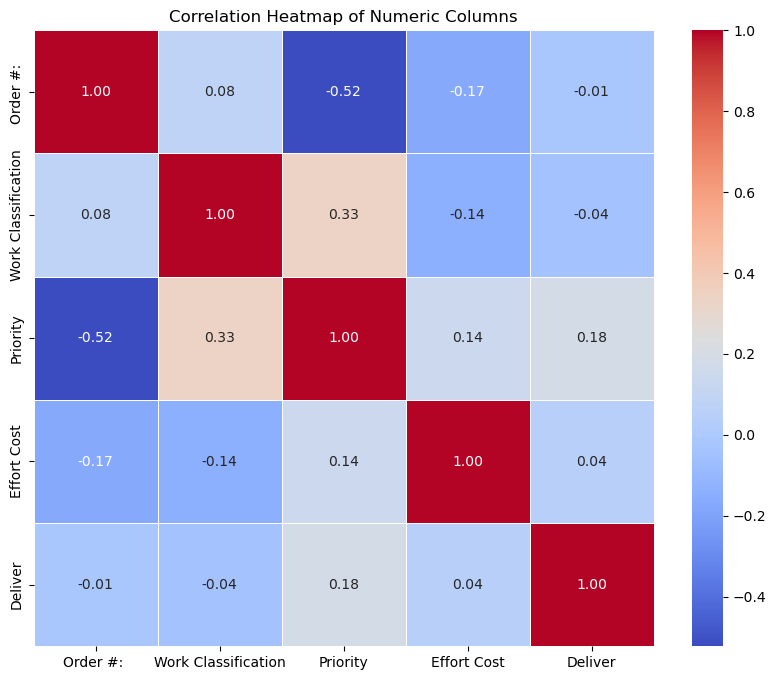

In [74]:
# Calculate correlation matrix
num_corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


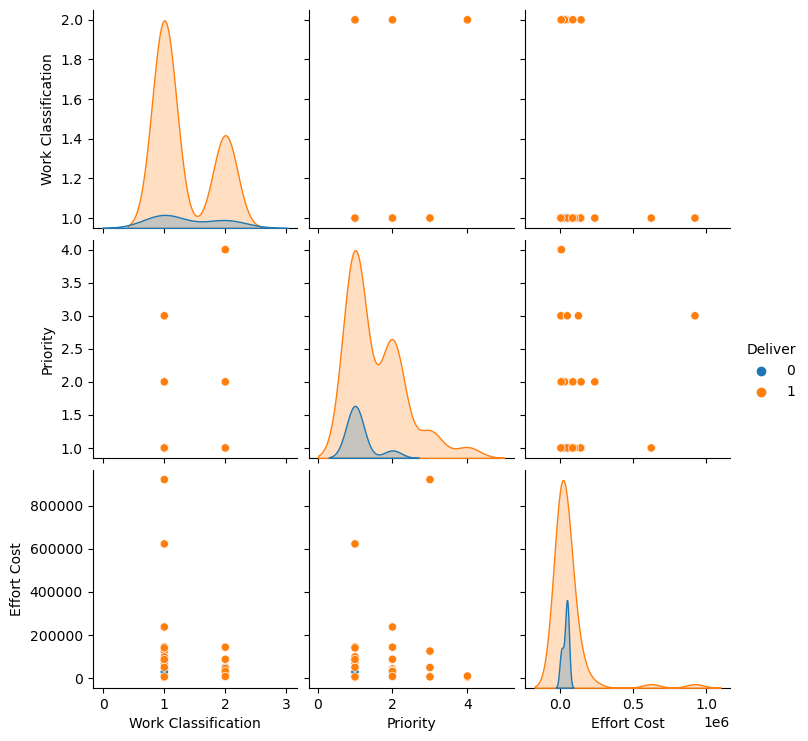

In [76]:
# Pariplot for Positively Correlated Variables
sns.pairplot(data=df, vars=['Work Classification', 'Priority', 'Effort Cost'], hue='Deliver')
plt.show()

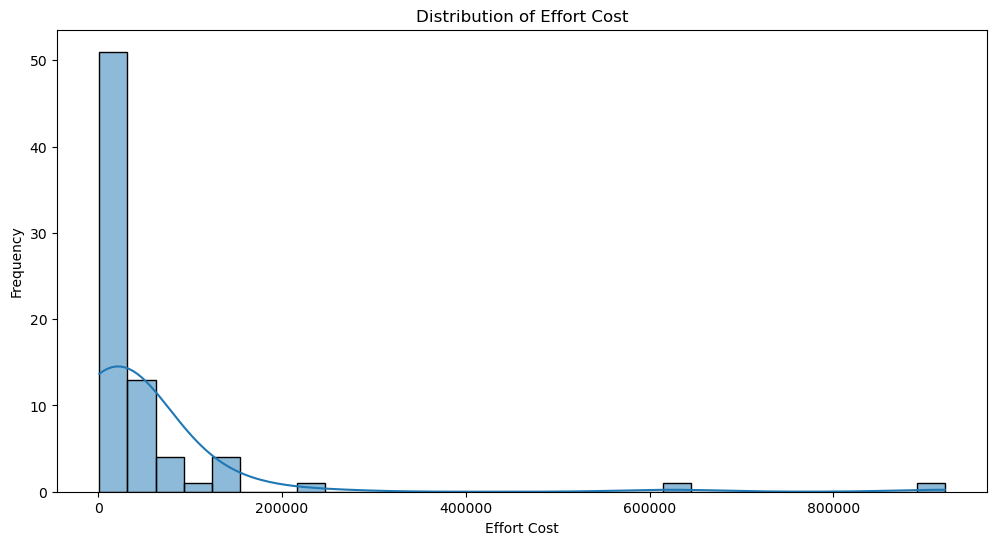

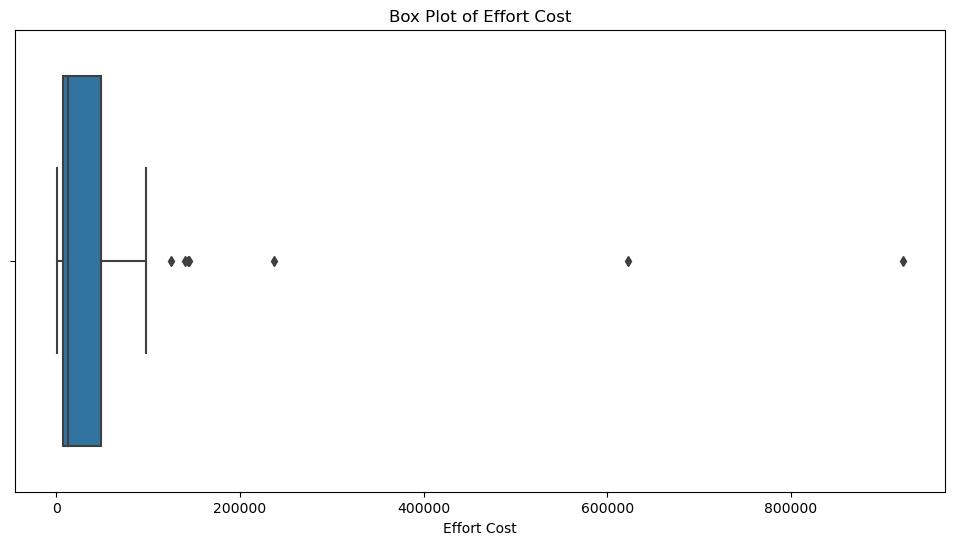

In [88]:
# Plotting the distribution of "Effort Cost"
plt.figure(figsize=(12, 6))
sns.histplot(df['Effort Cost'], kde=True, bins=30)
plt.title('Distribution of Effort Cost')
plt.xlabel('Effort Cost')
plt.ylabel('Frequency')
plt.show()

# Identifying outliers in "Effort Cost" using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Effort Cost'])
plt.title('Box Plot of Effort Cost')
plt.xlabel('Effort Cost')
plt.show()

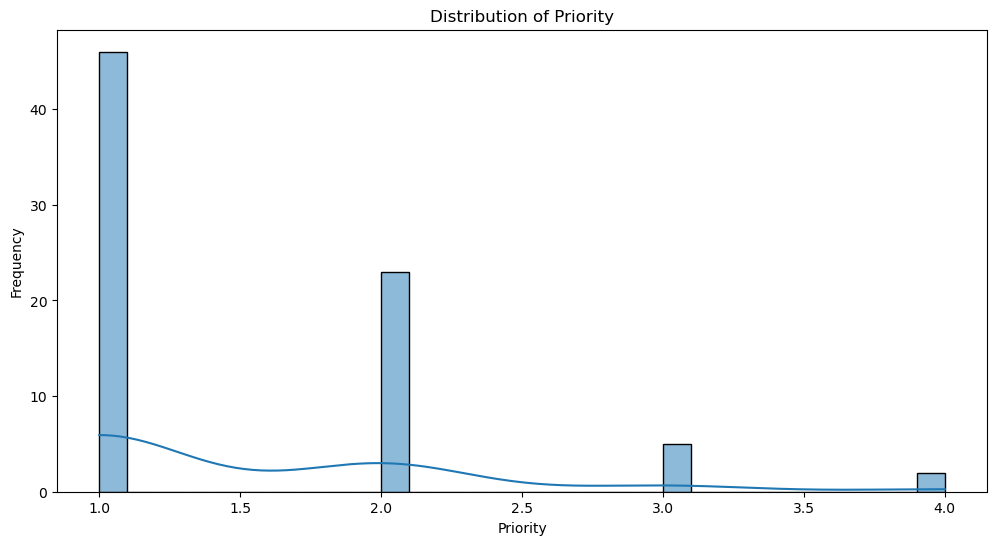

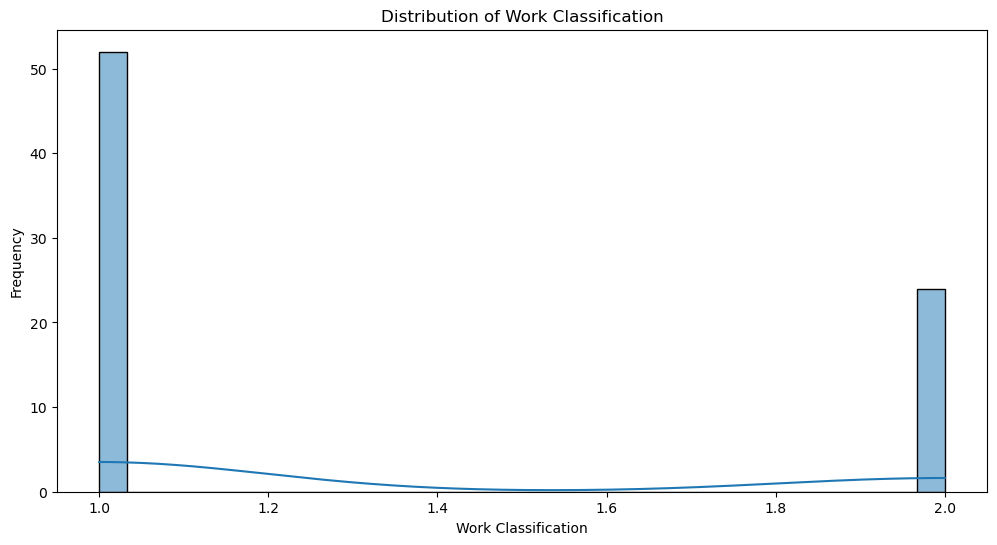

In [92]:
# Plotting the distribution of "Priority"
plt.figure(figsize=(12, 6))
sns.histplot(df['Priority'], kde=True, bins=30)
plt.title('Distribution of Priority')
plt.xlabel('Priority')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of "Work Classification"
plt.figure(figsize=(12, 6))
sns.histplot(df['Work Classification'], kde=True, bins=30)
plt.title('Distribution of Work Classification')
plt.xlabel('Work Classification')
plt.ylabel('Frequency')
plt.show()


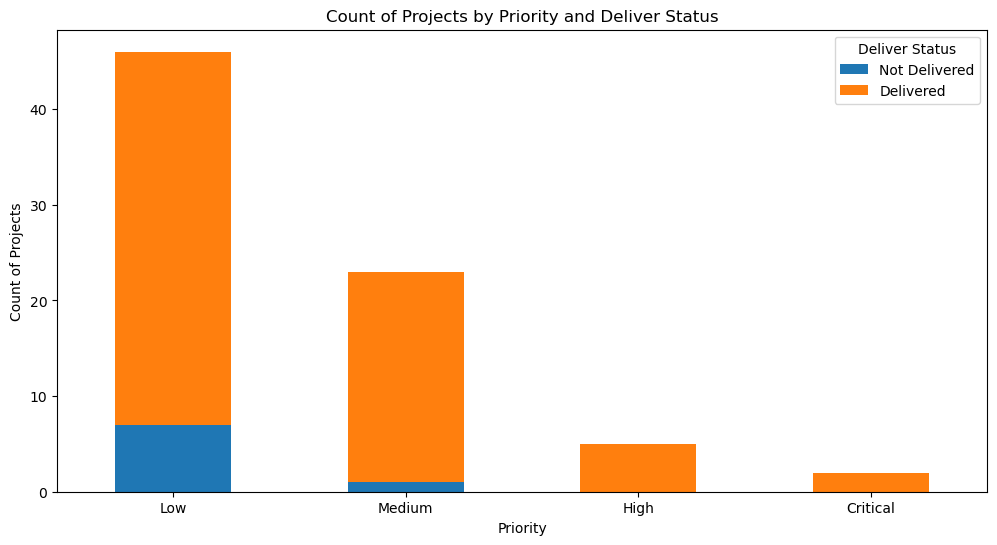

In [82]:
# Preparing the data for a stacked bar plot
stacked_data = df.groupby(['Priority', 'Deliver']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Count of Projects by Priority and Deliver Status')
plt.xlabel('Priority')
plt.ylabel('Count of Projects')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low', 'Medium', 'High', 'Critical'], rotation=0)
plt.legend(title='Deliver Status', labels=['Not Delivered', 'Delivered'])
plt.show()

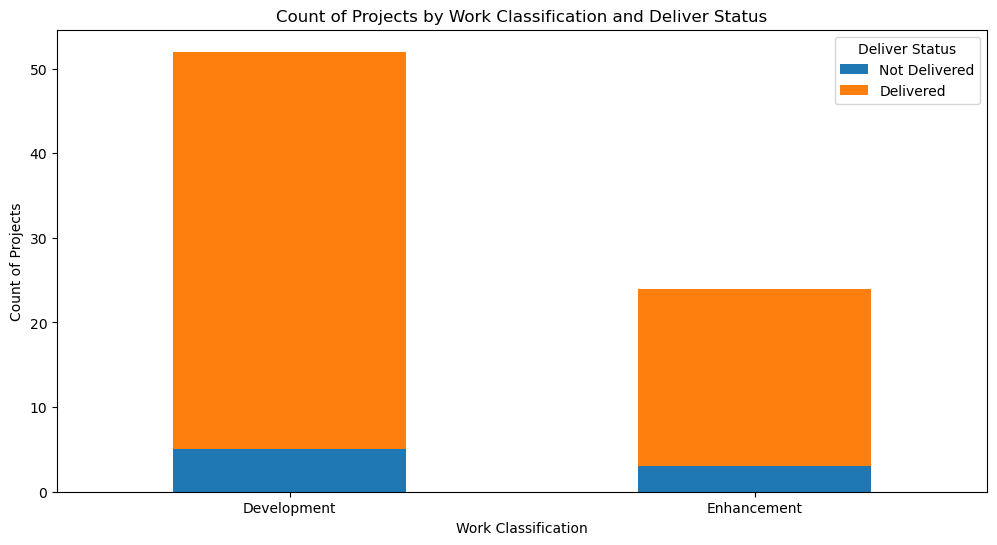

In [83]:
# Preparing the data for a stacked bar plot
stacked_data = df.groupby(['Work Classification', 'Deliver']).size().unstack(fill_value=0)

# Plotting the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Count of Projects by Work Classification and Deliver Status')
plt.xlabel('Work Classification')
plt.ylabel('Count of Projects')
plt.xticks(ticks=[0, 1], labels=['Development', 'Enhancement'], rotation=0)
plt.legend(title='Deliver Status', labels=['Not Delivered', 'Delivered'])
plt.show()